<a href="https://colab.research.google.com/github/kirantrk/DS-PARTICE-1/blob/master/TF_PAR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.3.2)


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import tensorflow_datasets as tfds

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset , metadata = tfds.load('fashion_mnist' , as_supervised= True , with_info=True)
train_dataset , test_dataset = dataset['train'] , dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images , labels):
  images = tf.cast(images ,tf.float32)
  images /=255
  return images , labels

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [0]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

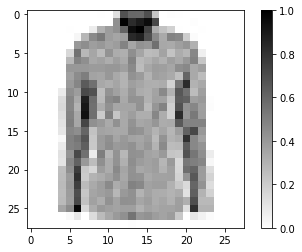

In [12]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
  

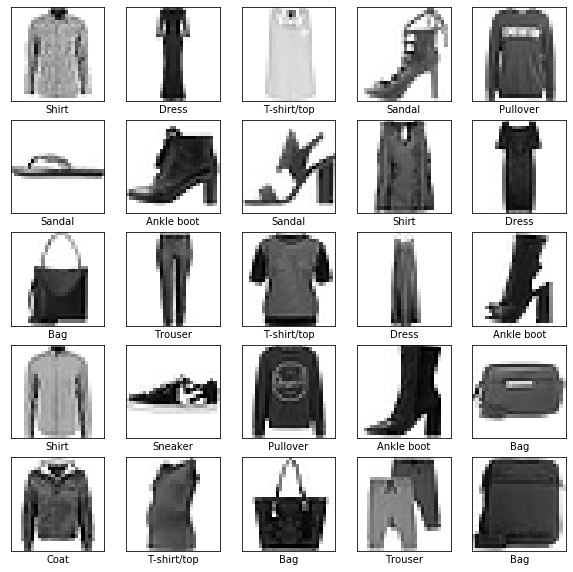

In [13]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(128,activation=tf.nn.relu),
     tf.keras.layers.Dense(10,activation=tf.nn.softmax)                 
                    


])

In [0]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [17]:
test_loss , test_accuracy = model.fit(train_dataset , epochs = 5 , steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4918 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3717 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3136 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.8912


TypeError: ignored

In [0]:
for test_images , test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [20]:
predictions.shape

(32, 10)

In [27]:
predictions[0]

array([2.3617768e-05, 2.6877021e-07, 1.3171250e-02, 7.8842648e-05,
       1.6037929e-01, 6.7964827e-08, 8.2633966e-01, 5.1529814e-10,
       7.0333303e-06, 8.8166958e-09], dtype=float32)

In [28]:
np.argmax(predicitions[0])

6

In [29]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

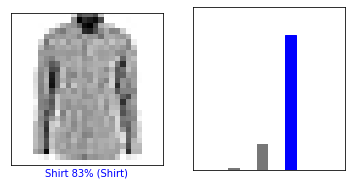

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

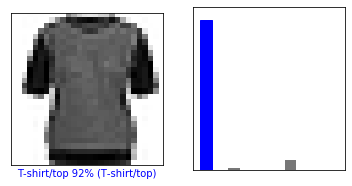

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

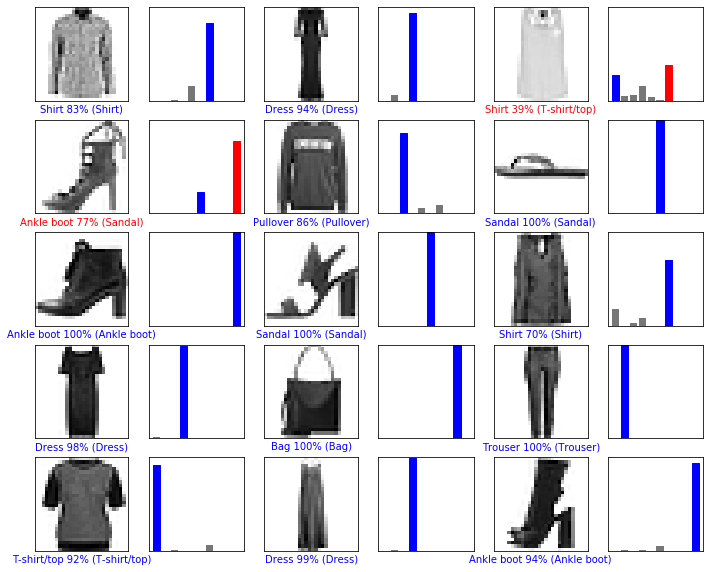

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [33]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [34]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.3617798e-05 2.6877109e-07 1.3171255e-02 7.8842837e-05 1.6037972e-01
  6.7965047e-08 8.2633919e-01 5.1529980e-10 7.0333526e-06 8.8167074e-09]]


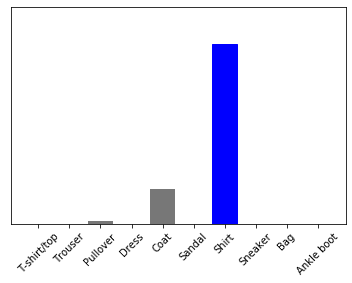

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

6